In [1]:
%pylab inline
from random import sample
from scipy.io import savemat, loadmat
from scipy.sparse.linalg import svds
from scipy.spatial.distance import squareform, pdist, cdist
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def roseland(datas, s=3):
    landmarks = datas[sample(range(n), round(sqrt(n)))]
    
    Dis = cdist(datas, landmarks)
    Dis_sort = sort(Dis, 1)
    Dis = Dis**2
    W = Dis / (percentile(Dis_sort[:, s+1], 50) ** 2)
    W = exp(-W)
    
    W_R = W.dot(W.T)
    D = diag(1 / sqrt( sum(W_R, axis=1) ))
    Q = D.dot(W)
    
    U, S, _ = svds(Q, 4)
    qvals = diag(S[::-1] * S[::-1])
    U = D.dot(U[:, ::-1])
    
    M = real(U.dot(qvals))
    return M

In [3]:
def showfig_orig(labels = []):
    if d == 2:
        plt.scatter(datas[:, 0], datas[:, 1], s=5)
        plt.title(f'Orginal datas, N={N}')
    elif d == 3:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(datas[:, 0], datas[:, 1], datas[:, 2], s=5)
        ax.set_title('Data in diffusion space (3d)')
    plt.show()
        
def showfig_2():
    x, y = M[:,1], M[:,2]
    X = np.array(list(zip(x, y)))
    SIZE, cluster = 15, 4
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
    axs[0,0].scatter(datas[:,0], datas[:,1], s=SIZE)
    axs[0,0].set_title(f'Data in original space, N={n}')
    
    axs[0,1].scatter(M[:,1], M[:,2], s=SIZE)
    axs[0,1].set_title('Data in diffusion space (2d)') 
    
    kmeans = KMeans(cluster)
    kmeans = kmeans.fit(X)
    labels = np.array(kmeans.predict(X)).reshape(n, 1)
    
    cmap= cm.brg
    norm = plt.Normalize(0, cluster)
    colors = cmap(norm(labels+1))
    
    axs[1,0].scatter(datas[:,0], datas[:,1], s=SIZE, color=colors)
    axs[1,0].set_title('Data after labeling')
    
    axs[1,1].scatter(M[:,1], M[:,2], s=SIZE, color=colors)
    axs[1,1].set_title('Data(DM) after labeling')
    plt.gcf().set_size_inches(12,8)
    plt.show()

def showfig_3():
    x, y, z = M[:,1], M[:,2], M[:,3]
    X = np.array(list(zip(x, y, z)))
    SIZE, cluster = 15, 4
    
    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(0, n)
    colors = cmap(norm([i for i in range(n)]))
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
    axs[0,0].set_axis_off()
    axs[0,0] = fig.add_subplot(221, projection='3d')
    axs[0,0].scatter(datas[:,0], datas[:,1], datas[:,2], s=2)
    axs[0,0].set_title('Data after labeling')
    
    axs[0,1].set_axis_off()
    axs[0,1] = fig.add_subplot(222, projection='3d')
    axs[0,1].scatter(x, y, z, s=SIZE)
    axs[0,1].set_title('Data in diffusion space (3d)')
    
    kmeans = KMeans(cluster)
    kmeans = kmeans.fit(X)
    labels = np.array(kmeans.predict(X)).reshape(n, 1)
    
    cmap= cm.brg
    norm = plt.Normalize(0, cluster)
    colors = cmap(norm(labels+1))
    
    axs[1,0].set_axis_off()
    axs[1,0] = fig.add_subplot(223, projection='3d')
    axs[1,0].scatter(datas[:,0], datas[:,1], datas[:,2], s=2, color=colors)
    axs[1,0].set_title('Data after labeling')
    
    axs[1,1].set_axis_off()
    axs[1,1] = fig.add_subplot(224, projection='3d')
    axs[1,1].scatter(x, y, z, s=SIZE, color=colors)
    axs[1,1].set_title('Data(DM) after labeling')
    plt.gcf().set_size_inches(12,8)
    plt.show()

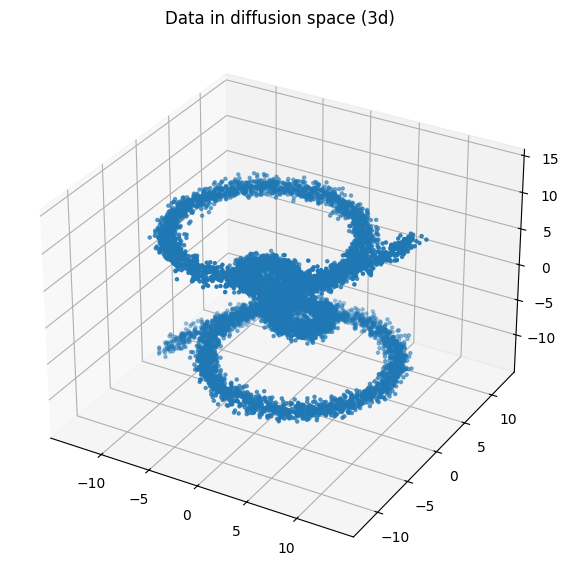

10000 datas in 3-dimension


In [4]:
# Read datas

orig = loadmat('datas/data4_1.mat')

datas = orig['data']
n, d = datas.shape

showfig_orig()

print(f'{n} datas in {d}-dimension')

In [5]:
M = roseland(datas, 3)

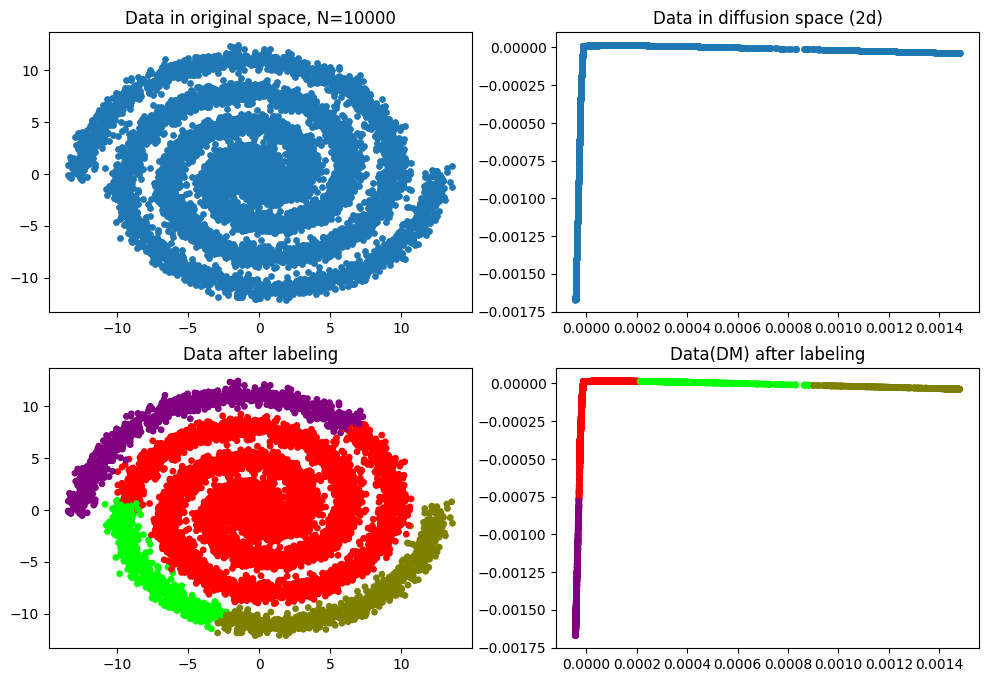

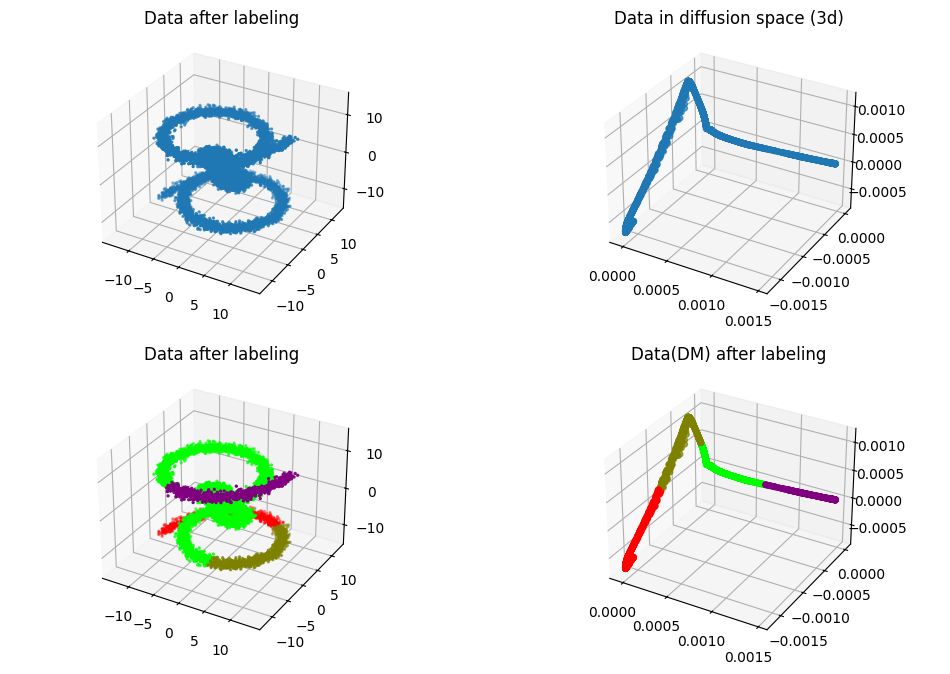

In [6]:
showfig_2()
showfig_3()

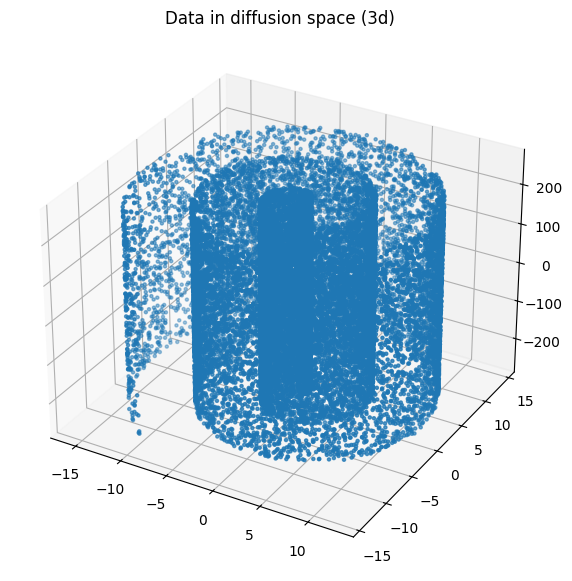

25000 datas in 3-dimension


In [7]:
# Read datas

orig = loadmat('datas/data6.mat')

datas = orig['data']
n, d = datas.shape

showfig_orig()

print(f'{n} datas in {d}-dimension')

In [8]:
M = roseland(datas, 3)

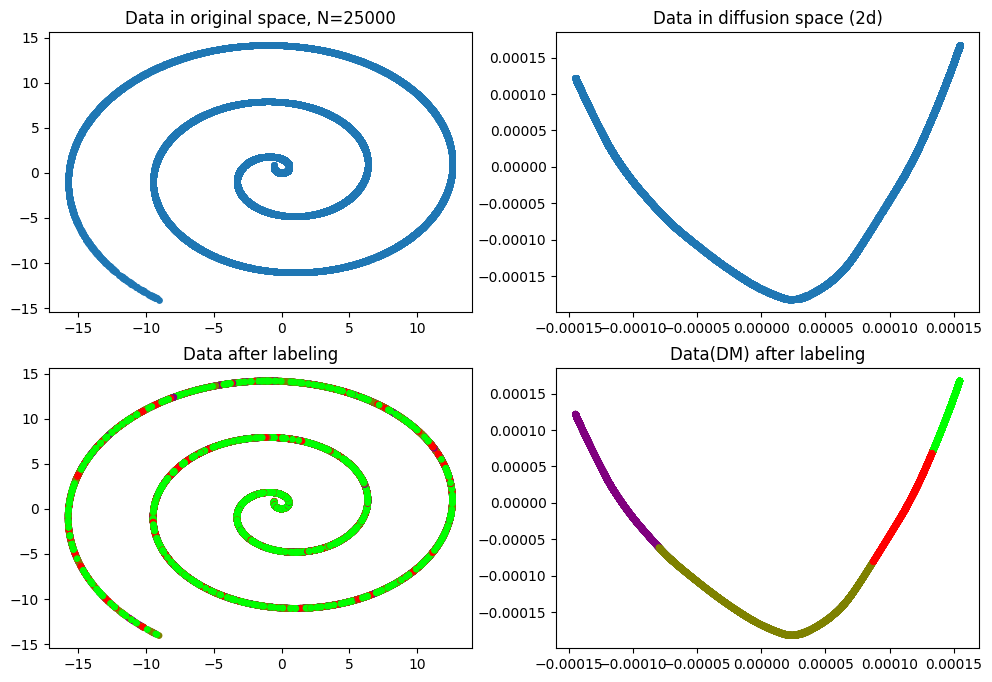

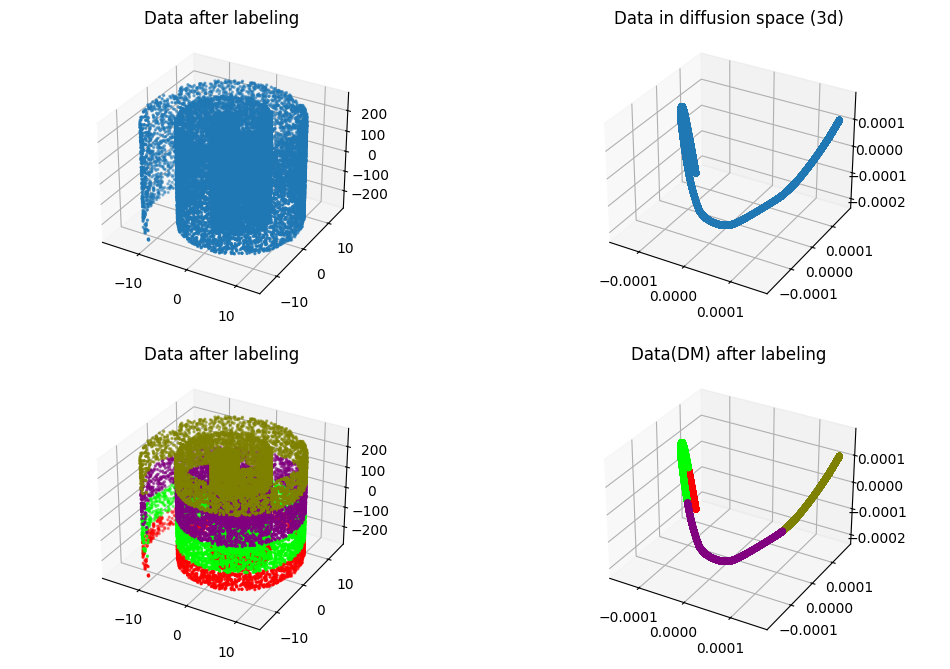

In [9]:
showfig_2()
showfig_3()

In [ ]:
def get_W(data, landmark):
    W = cdist(data, landmark)
    eps = np.sqrt(np.median(np.median(W, axis=1)))
    W = np.exp(- W * W / eps)
    return W

def get_eig(W, c):
    s = np.sum(W.dot(W.T), axis=1)
    D = np.diag(1 / np.sqrt(s))
    Q = D.dot(W)

    U, S, _ = svds(Q, c + 1)
    eigenvals = S[::-1] * S[::-1]
    eig_vecs = D.dot(U[:, ::-1])
    return eigenvals, eig_vecs

landmarks = datas[sample(range(n), round(sqrt(n)))]
W_r = get_W(datas, landmarks)
eig_vals, eig_vecs = get_eig(W_r, 4)
eig_vecs = eig_vecs / np.linalg.norm(eig_vecs, axis=0)
M = eig_vecs.dot(np.diag(eig_vals))[:, 1:]